In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

wine = pd.read_csv('C:/Users/HARSHIT/Desktop/ML/DataSETS/wine.csv')

In [3]:
wine.drop('id',axis=1,inplace=True)
wine.sample(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
74063,US,"Balanced and food-friendly, this white is stai...",Centa Vineyard,92,18.0,California,St. Helena,Napa,Virginie Boone,@vboone,Gibbs 2016 Centa Vineyard Sauvignon Blanc (St....,Sauvignon Blanc,Gibbs
85255,New Zealand,Framingham is one of New Zealand's top Rieslin...,Classic,90,25.0,Marlborough,NaN,NaN,Joe Czerwinski,@JoeCz,Framingham 2013 Classic Riesling (Marlborough),Riesling,Framingham
70756,Chile,"Oily, uric aromas of nettle and cactus are at ...",Albamar,82,12.0,Casablanca Valley,NaN,NaN,Michael Schachner,@wineschach,William Cole 2015 Albamar Sauvignon Blanc (Cas...,Sauvignon Blanc,William Cole


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [5]:
wine.describe()


,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [6]:
'''from pandas_profiling import ProfileReport


prof = ProfileReport(wine)
prof.to_file(output_file='Output_wine.html')'''

"from pandas_profiling import ProfileReport\n\n\nprof = ProfileReport(wine)\nprof.to_file(output_file='Output_wine.html')"

In [7]:
import numpy as np

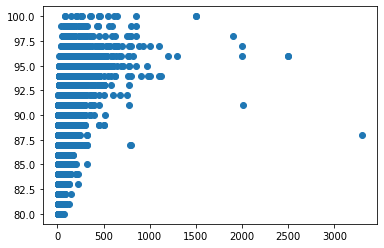

In [8]:
plt.scatter(wine['price'],wine['points'])

In [9]:
l = wine[wine['country'].isnull()]['winery'].tolist()
l = np.array(l)

In [10]:
grp = wine.groupby('winery')
l.shape

(63,)

In [11]:
j,count= np.unique(l,return_counts=True)
j.shape

(27,)

In [12]:
new = []

for i in range (0,26):
    if (grp.get_group(j[i])['price'].count()) > count[i]:
        
        print(j[i])
        new.append(j[i])
    
        

Bachelder
Barton & Guestier
Chilcas
Familia Deicas
Gotsa Family Wines
Ktima Voyatzi
Logodaj
Mt. Beautiful
Neumeister
Psagot
Santa Ema
Teliani Valley


In [13]:
new = np.array(new)

In [14]:
df =wine.dropna(axis=0,subset=['country'])

In [15]:
c = []
for i in range (0,12):
   c.append(df.loc[df.dropna(axis=0,subset=['country'])['winery'] == new[i], 'country'].iloc[0])

In [16]:
c = np.array(c)

In [17]:
for i in range (0,12):
  wine.loc[wine.winery == new[i],'country'] = c[i]


In [18]:
wine.dropna(axis=0,subset=['country'],inplace=True)

In [19]:
wine.shape

(129937, 13)

<AxesSubplot:>

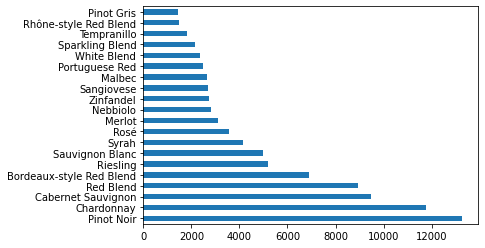

In [20]:
wine['variety'].value_counts()[:20].plot(kind= 'barh')

In [22]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [23]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129937 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129937 non-null  object 
 1   description            129937 non-null  object 
 2   designation            92477 non-null   object 
 3   points                 129937 non-null  int64  
 4   price                  120943 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103693 non-null  object 
 9   taster_twitter_handle  98724 non-null   object 
 10  title                  129937 non-null  object 
 11  variety                129936 non-null  object 
 12  winery                 129937 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [24]:
wine.describe()

,points,price
count,129937.000000,120943.000000
mean,88.447086,35.366933
std,3.040000,41.026888
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


sns.boxplot(wine['price'])